In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [2]:
os.listdir("../input")

['test.csv', 'train.csv', 'gender_submission.csv']

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
df_submit = pd.read_csv('../input/gender_submission.csv')

In [4]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [8]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

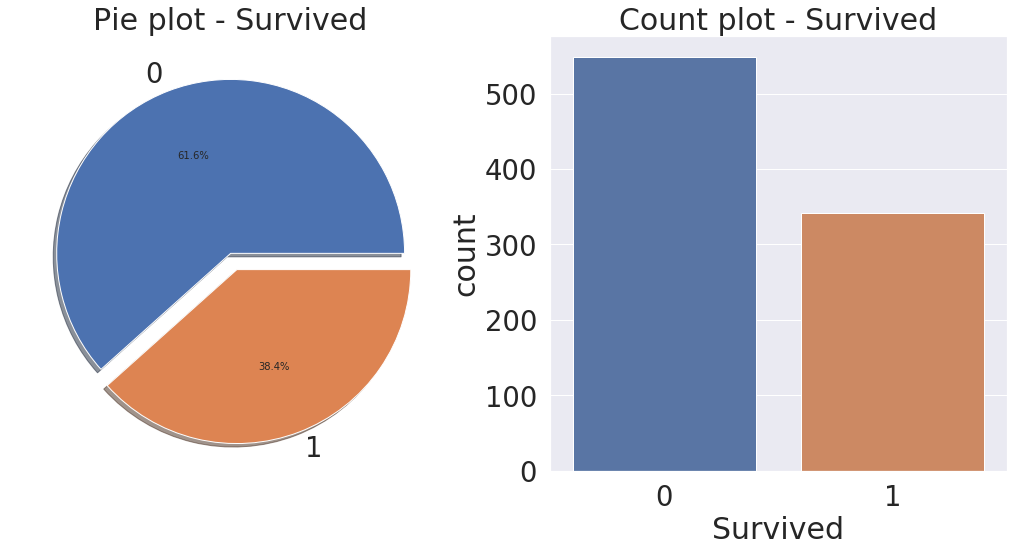

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

**2. EDA, Exploratory Data Analysis**

In [12]:
#2.1 Pclass
# data count by Pclass group
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# sum of Survied by Pclass group
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)
#pd.crosstab(df_train['Survived'], df_train['Pclass'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
# mean : ratio of Survived
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


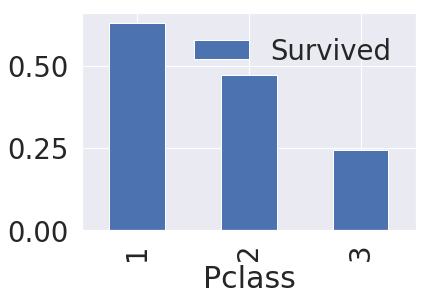

In [16]:
# bar graph
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

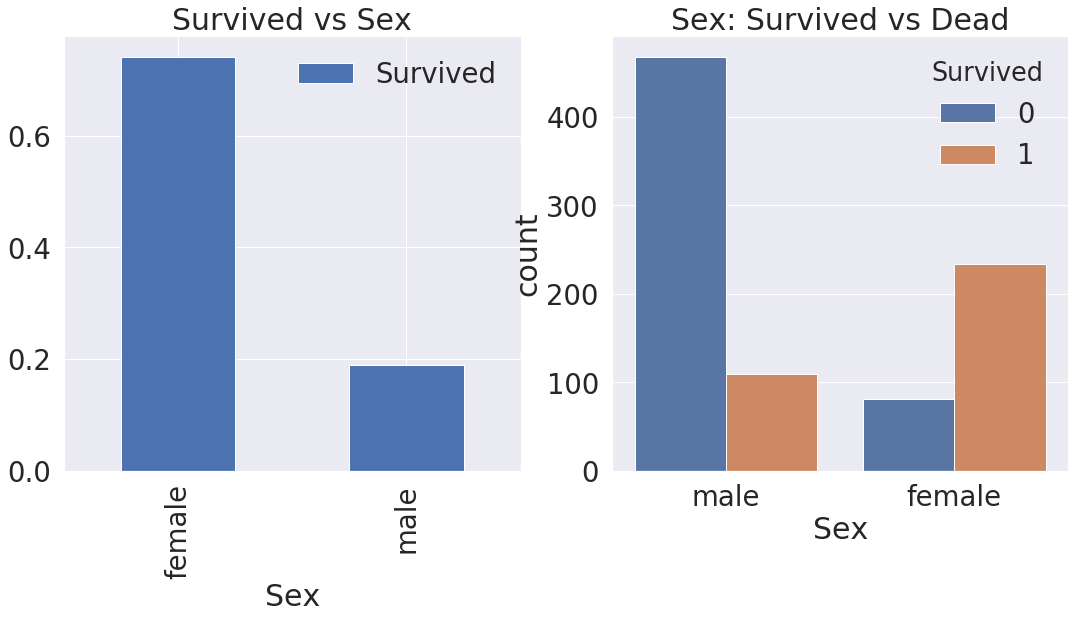

In [17]:
# 2.2 Sex
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

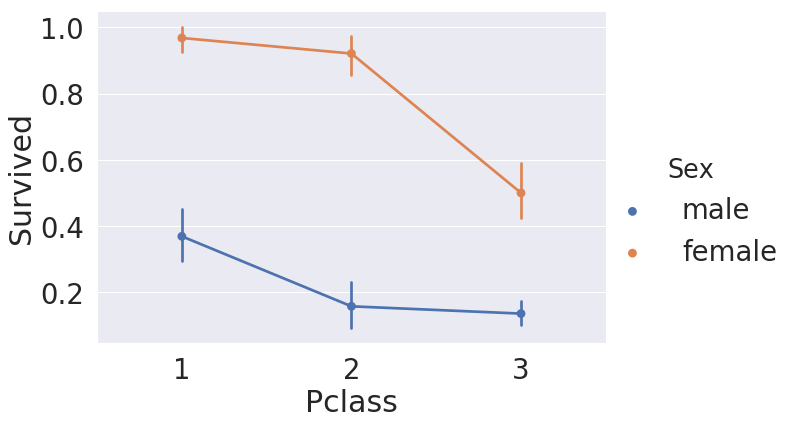

In [18]:
# 2.3 Both Sex and Pclass
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)          

In [19]:
# 2.4 Age
print('The oldest passenger : {:.1f} Years'.format(df_train['Age'].max()))
print('The youngest passenger : {:.1f} Years'.format(df_train['Age'].min()))
print('average of passenger : {:.1f} Years'.format(df_train['Age'].mean()))

The oldest passenger : 80.0 Years
The youngest passenger : 0.4 Years
average of passenger : 29.7 Years


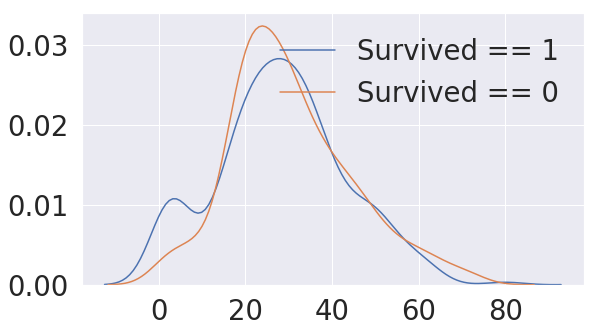

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

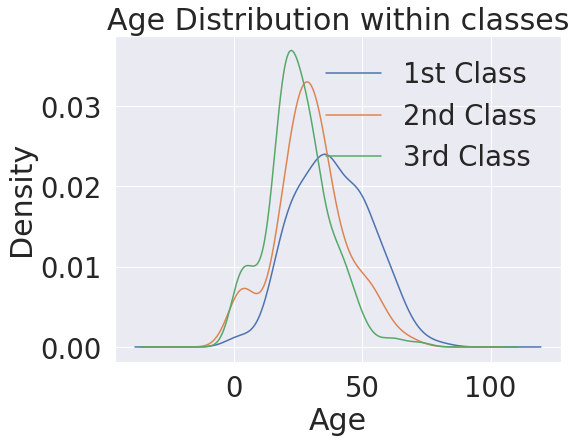

In [21]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

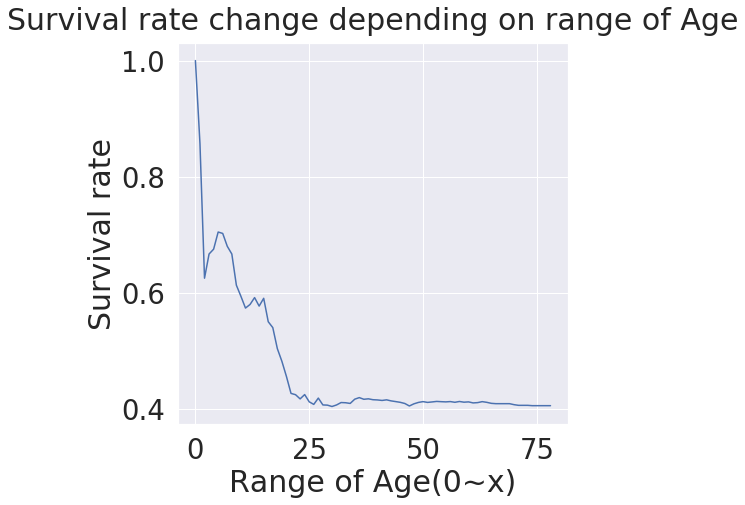

In [22]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()/len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [23]:
# 2.5 Embarked
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

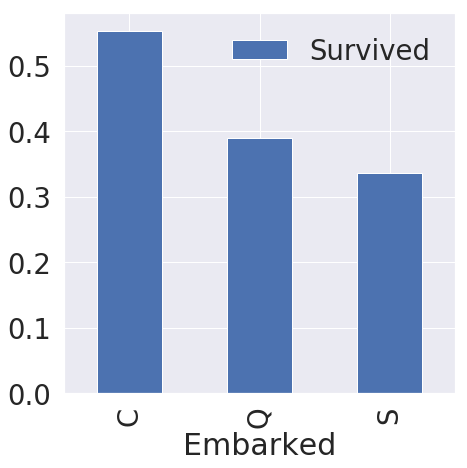

In [24]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)                

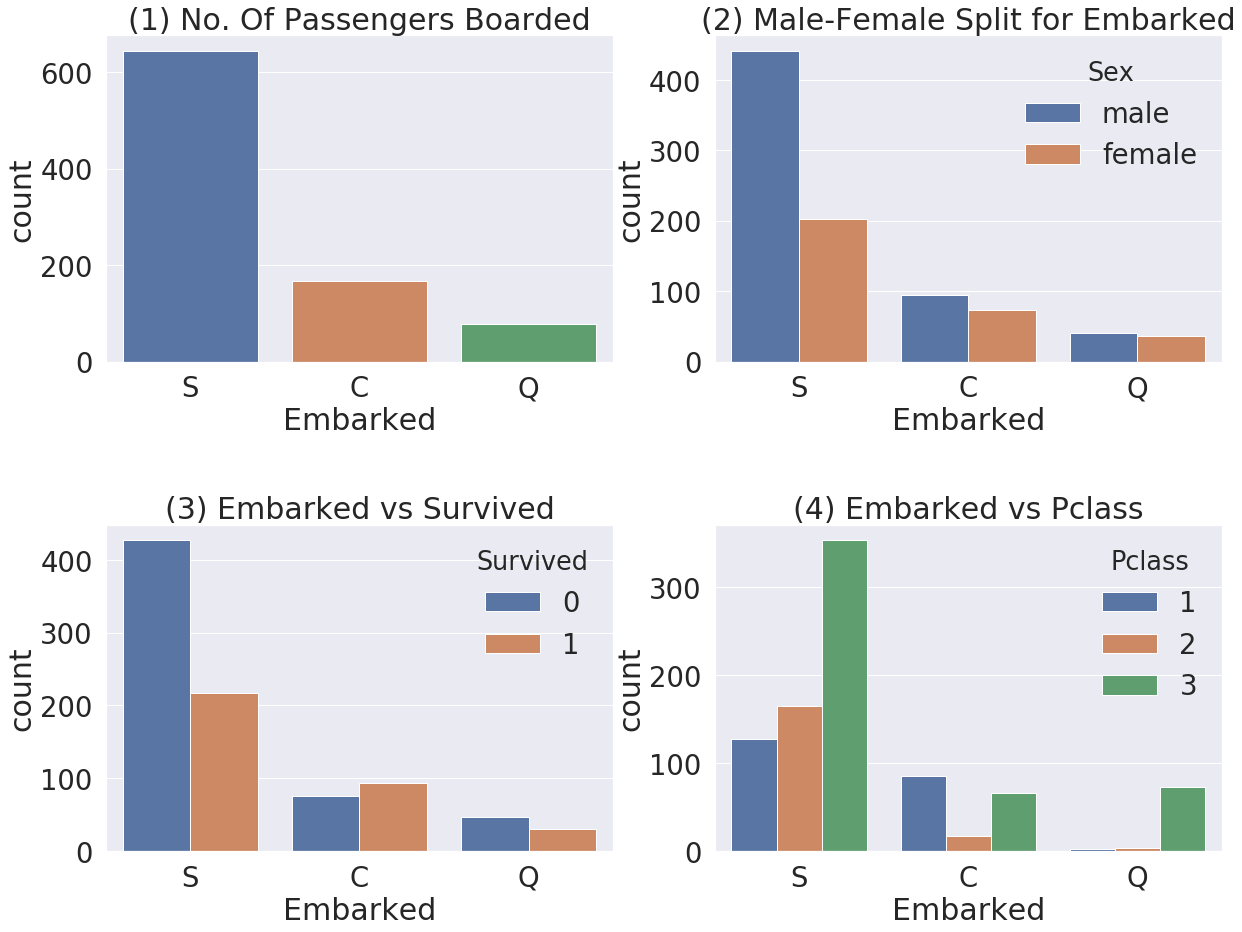

In [25]:
f, ax=plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [26]:
# 2.6 Family - SibSp + Parch
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자기 자신
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [27]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minumum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minumum size of Family:  1


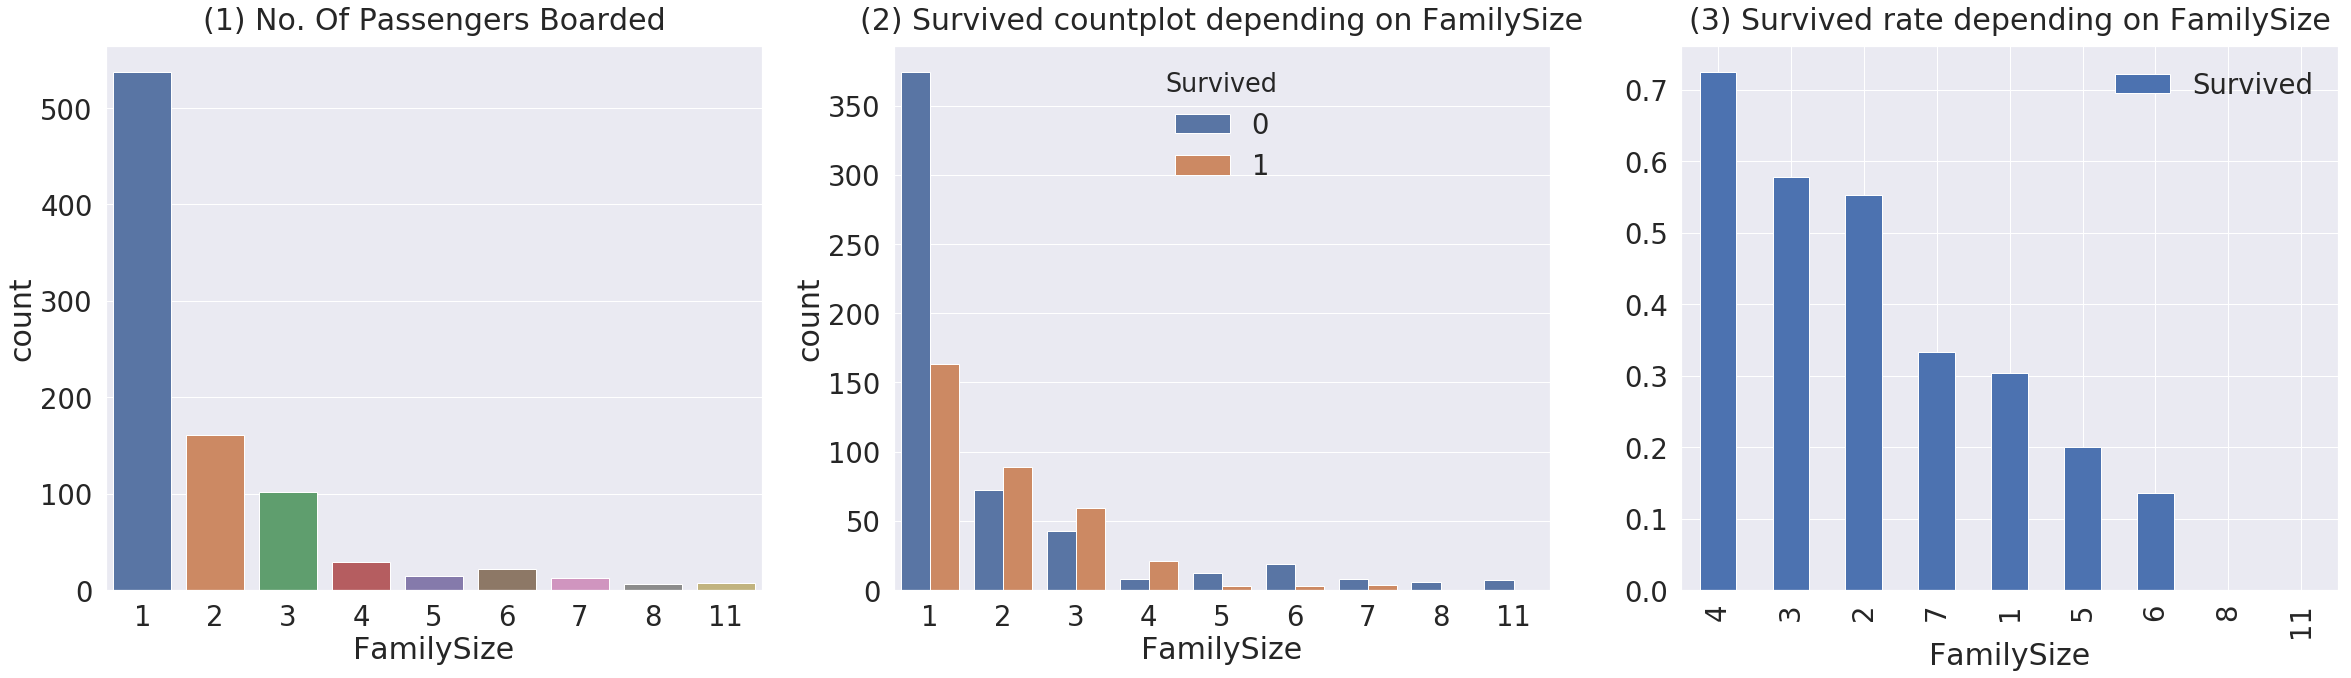

In [28]:
f, ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

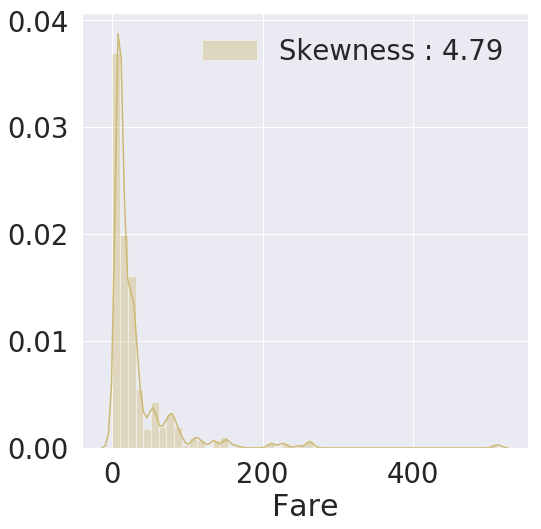

In [29]:
# 2.7 Fare
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='y', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [30]:
# feature engineering
# insert value average to null value in testset Fare
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train ['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

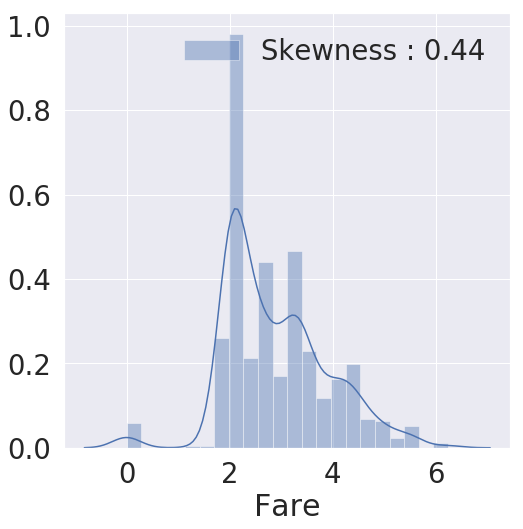

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [32]:
# 2.8 Cabin
# this feature is almost NaN about 80%

df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [33]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


In [34]:
# 2.9 Ticket
df_train['Ticket'].value_counts()

CA. 2343             7
1601                 7
347082               7
347088               6
3101295              6
CA 2144              6
S.O.C. 14879         5
382652               5
17421                4
2666                 4
PC 17757             4
4133                 4
W./C. 6608           4
113760               4
LINE                 4
19950                4
347077               4
113781               4
349909               4
29106                3
SC/Paris 2123        3
110413               3
347742               3
C.A. 31921           3
239853               3
24160                3
13502                3
PC 17582             3
248727               3
PC 17760             3
                    ..
PC 17474             1
226593               1
349207               1
SC/PARIS 2146        1
28425                1
S.W./PP 752          1
SC/Paris 2163        1
2641                 1
A/5 3540             1
PC 17600             1
370376               1
383121               1
4135       

**3. Feature Engineering**

In [35]:
# 3.1 Fill Null
# 3.1.1 Fill Null in Age Using title

df_train["Age"].isnull().sum()

177

In [36]:
# extract the Salutations
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [37]:
# Checking the Initials with the Sex
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [38]:
df_train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir']
                            ,['Mr','Mr','Miss','Mr','Mr','Mr','Miss','Mr','Miss','Miss','Miss','Mr','Mr']
                            ,inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [39]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,414.367021,0.707447,2.271277,22.105263,0.696809,0.531915,3.133775,2.228723
Mr,457.697026,0.161710,2.369888,33.022727,0.289963,0.150558,2.651341,1.440520
Mrs,453.160000,0.792000,2.000000,35.898148,0.696000,0.832000,3.433739,2.528000


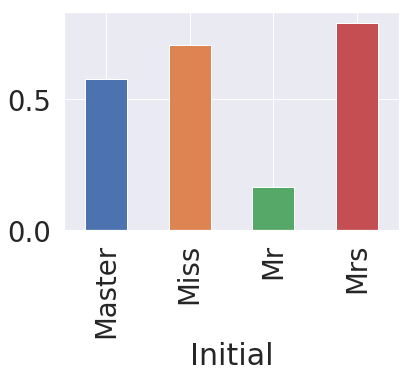

In [40]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [41]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,414.367021,0.707447,2.271277,22.105263,0.696809,0.531915,3.133775,2.228723
Mr,457.697026,0.161710,2.369888,33.022727,0.289963,0.150558,2.651341,1.440520
Mrs,453.160000,0.792000,2.000000,35.898148,0.696000,0.832000,3.433739,2.528000


In [42]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5        
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36

df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5        
df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36

In [43]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [44]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

In [45]:
# 3.1.2 Fill in Embarked
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


In [46]:
df_train['Embarked'].fillna('S', inplace=True)

In [47]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

In [48]:
# 3.2 Change Age (continuous to categorical)
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [49]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

In [50]:
# 3.3 Chage Initial, Embarked and Sex (string to numerical)
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3})

In [51]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [52]:
df_train['Embarked'].isnull().any(), df_train['Embarked'].dtypes

(False, dtype('int64'))

In [53]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

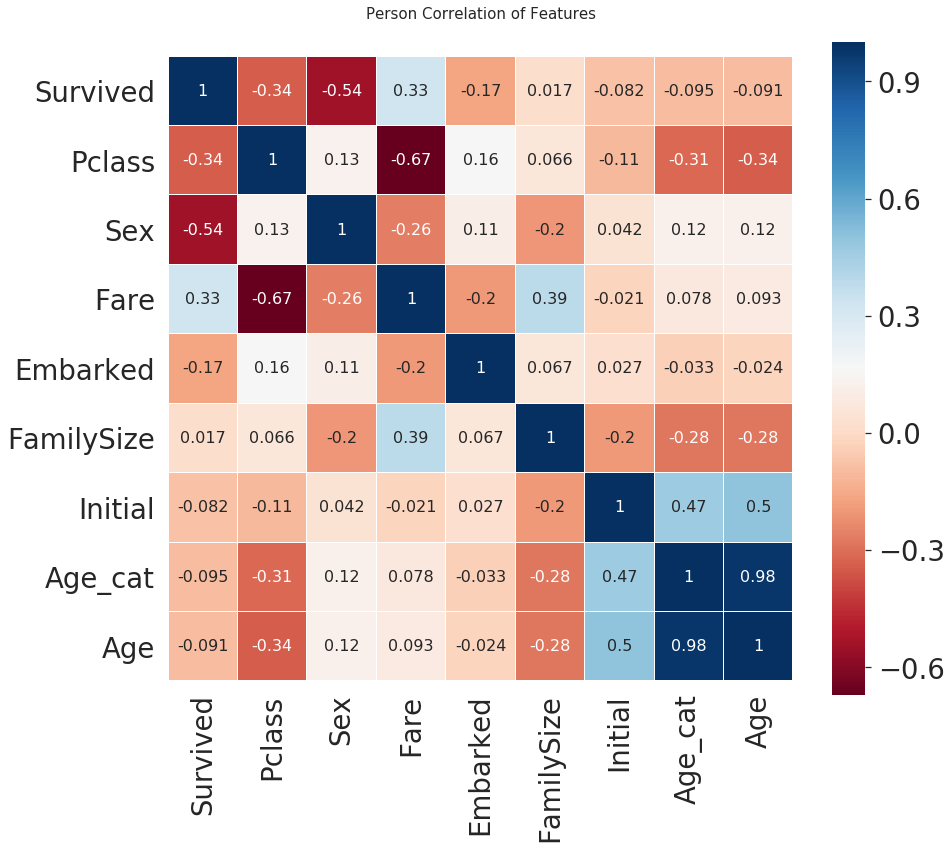

In [54]:
# Pearson correlation
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']]    

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Person Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0
           ,square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [55]:
# 3.4 One-hot encoding on Initial and Embarked
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0


In [57]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')   

In [58]:
# 3.5 Drop columns
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)    

In [59]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,1


In [60]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [61]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,1


In [62]:
df_test.dtypes

Pclass           int64
Sex              int64
Age            float64
Fare           float64
FamilySize       int64
Age_cat          int64
Initial_0.0      uint8
Initial_1.0      uint8
Initial_2.0      uint8
Initial_3.0      uint8
Embarked_0       uint8
Embarked_1       uint8
Embarked_2       uint8
dtype: object

In [63]:
# 4.Model development and learning

# importing all the required ML packages
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# model evaluate
from sklearn import metrics
# slipt training set
from sklearn.model_selection import train_test_split


In [64]:
# 4.1 Preparation - Split dataset into train, valid(dev), testset

X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values   
X_test = df_test.values

In [65]:
X_train.shape, X_test.shape

((891, 13), (418, 13))

In [66]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)      

In [67]:
y_tr.shape, y_vld.shape

((712,), (179,))

In [68]:
# 4.2 Model generation and prediction
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [69]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))              

총 179명 중 79.33% 정확도로 생존을 맞춤


In [70]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

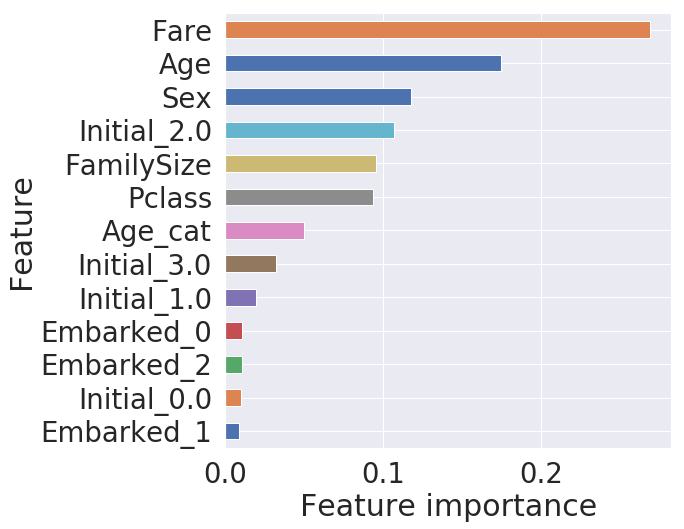

In [71]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [72]:
# 4.3 NN model development using keras

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam, SGD

In [73]:
nn_model = Sequential()
nn_model.add(Dense(32, activation = 'relu', input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation='sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss, optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)  

In [74]:
# 5. Model prediction and evaluation

submission = pd.read_csv('../input/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [75]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [76]:
submission.to_csv('my_first_submission.csv', index=False)